# Homework 3

Author : Yichen Xie

NetID: yx2606

In this homework you will use `sklearn` to analyze and visualize model performance. You will be required to use the _new_ `sklearn` implementations, as well as write some of your own functions. You can see `sklearn`'s new visualization API documentation [here](https://scikit-learn.org/stable/visualizations.html#visualizations).

*Do not change* the code block below. It generates the data and trains the model you use.

In [20]:
# Constants. DO NOT CHANGE.
RANDOM_STATE = 2022

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1_000, n_features=20, n_informative=2, n_redundant=10, random_state=RANDOM_STATE
)  # Generate data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=RANDOM_STATE
)  # Split into test and train set

clf = RandomForestClassifier(random_state=RANDOM_STATE)  # Random Forest model
clf.fit(X_train, y_train)

y_preds_proba = clf.predict_proba(X_test)  # Predicted probabilities
y_preds_label = clf.predict(X_test)  # Predicted label

In [21]:
# Probability predictions. First column is for class "0", second is for class "1"
y_preds_proba

array([[0.99, 0.01],
       [0.91, 0.09],
       [0.1 , 0.9 ],
       ...,
       [0.99, 0.01],
       [0.09, 0.91],
       [0.26, 0.74]])

In [22]:
# Label predictions using a standard 0.5 threshold
print(len(y_preds_label))

800


# (1) Plot Confusion Matrix

Plot the confusion matrix for the test set.

In [23]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

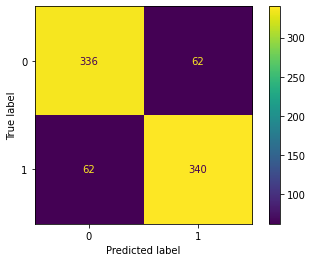

In [24]:
# Plot the confusion matrix for the test set.
plot_confusion_matrix(clf,X_test,y_test)

# (2) Classification Report

Calculate the precision, recall, accuracy and f1-score for the test set.

In [25]:
# Calculate the precision, recall, accuracy and f1-score for the test set.
from sklearn.metrics import classification_report
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(y_preds_label)):
    if y_test[i] == 1 and y_preds_label[i] == 1:
        TP += 1
    if y_test[i] == 0 and y_preds_label[i] == 0:
        TN += 1
    if y_test[i] == 0 and y_preds_label[i] == 1:
        FP += 1
    if y_test[i] == 1 and y_preds_label[i] == 0:
        FN += 1

print("TP",TP,"TN",TN,"FP",FP,"FN",FN)

Precison = TP / (TP + FP)
Recall = TP / (TP + FN)
Accuracy = (TP + TN) / (TP + FP + TN + FN)
f1_score = 2*TP / (2 * TP + FP + FN)

print("Precision:",Precison,"Recall:",Recall,"Accuracy:",Accuracy,"f1_score:",f1_score)
print(classification_report(y_test, y_preds_label))

TP 340 TN 336 FP 62 FN 62
Precision: 0.845771144278607 Recall: 0.845771144278607 Accuracy: 0.845 f1_score: 0.845771144278607
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       398
           1       0.85      0.85      0.85       402

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



# (3) Plot ROC Curve and Report AUC

Plot the ROC curve and report the AUC for the test set.

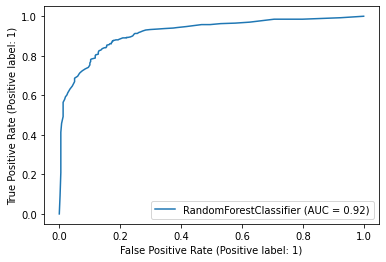

In [26]:
# Plot the ROC curve and report the AUC for the test set.
plot_roc_curve(clf,X_test,y_test)

The AUC is 0.92

# (4) Expected Calibration Error (ECE), Maximum Calibration Error (MCE), Plot Reliability Diagram

Using `calibration_curve`, which you can access via `from sklearn.calibration import calibration_curve`, calculate:

ECE when `calibration_curve(..., method="quantile")` -- this produces bins of equal sample size
MCE when `calibration_curve(..., method="uniform")` -- this produces bins of equal width

Then, plot the reliability diagram for `method="quantile"` and `method="uniform"`. Comment on which one you believe is "better" to report (i.e., what are the pros and cons of using "quantile" compared to "uniform")



In [27]:
from sklearn.calibration import calibration_curve
# Calculated ECE for calibration_curve(..., strategy="quantile")
prob_true_q, prob_pred_q = calibration_curve(y_test,y_preds_proba[:,1],n_bins=5,strategy="quantile")
# Calculate MCE for calibration_curve(..., strategy="uniform")
prob_true_u, prob_pred_u = calibration_curve(y_test,y_preds_proba[:,1],n_bins=5,strategy="uniform")
# Plot reliability diagrams for each

NameError: name 'check_matplotlib_support' is not defined

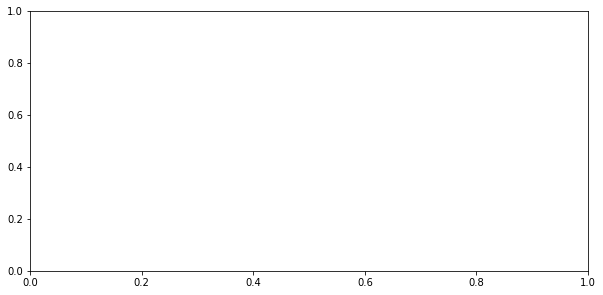

In [28]:
from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])

CalibrationDisplay.from_estimator(clf, X_test, y_test, n_bins=50, name="Random Forest (Quantile)",strategy="quantile",ax=ax_calibration_curve)

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

Text(0.5, 1.0, 'Calibration plots')

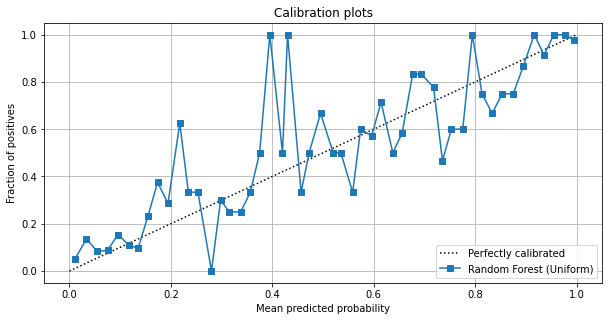

In [ ]:
from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])

CalibrationDisplay.from_estimator(clf, X_test, y_test, n_bins=50, name="Random Forest (Uniform)",strategy="uniform",ax=ax_calibration_curve)

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

I think the "uniform" one is better to report.

As we can see, the "quantile" method have more bins concentratingon the two edges of the curve, which means the predictions mainly relies on the "simple" samples. But in the "uniform" calibration curve, we can see fluctuations more obviously, thus we can find that the random forest have unreliable predictions when it faced with those data which are hard to classify and only take a small part in the dataset. And we can see the ramdom forest is more likely to give positive predictions to the difficult data. So if we use a more complex dataset, the random forest may not work so well as this simple condition.

# (5) Brier Score and Log Loss

Write your own Brier Score and Log Loss functions for the data from above. Ensure that the outputs equal those from `sklearn`. You can access `sklearn`'s implementation using 

```
from sklearn.metrics import brier_score_loss, log_loss
```

DO NOT simply write a wrapper for `sklearn`'s implementation. Write your own, test it, and show the results of the test.

In [ ]:
from sklearn.metrics import brier_score_loss, log_loss
print("brier_score_loss:",brier_score_loss(y_test,y_preds_proba[:,1]))
print("log_loss:",log_loss(y_test,y_preds_proba[:,1]))

brier_score_loss: 0.1130645
log_loss: 0.521981147990606


In [ ]:
import numpy as np
def custom_brier_score(y_true,y_predict):
  N = len(y_true)
  sum = 0
  for i in range(N):
    sum += (y_true[i] - y_predict[i])**2
  return sum/N

def custom_log_loss(y_true,y_predict):
  N = len(y_true)
  sum = 0.0
  eps = 1e-15
  for i in range(N):
    pred = np.clip(y_predict[i], eps, 1 - eps)
    sum += ( y_true[i] * np.log(pred) + np.subtract(1,y_true[i]) * np.log(np.subtract(1,pred)) )
  return -sum/N

print("custom_brier_score:",custom_brier_score(y_test,y_preds_proba[:,1]))
print("custom_log_loss:",custom_log_loss(y_test,y_preds_proba[:,1]))


custom_brier_score: 0.11306450000000019
custom_log_loss: 0.5219811479906065
